<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/Convolutional_Neural_Network_(CNN)_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# unzips neccessarry zip files in Drive
# only needs to be run once for your Drive
!unzip -uq "/content/drive/MyDrive/test.csv.zip" -d "/content/drive/My Drive/"
!unzip -uq "/content/drive/MyDrive/train.csv.zip" -d "/content/drive/My Drive/"

In [ ]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.datasets import mnist

# Loading the Data Set

In [ ]:
ROOT_PATH = "/content/drive/MyDrive"

train_data_directory = os.path.join(ROOT_PATH, "CNN_tutorial/train.csv")
test_data_directory = os.path.join(ROOT_PATH, "CNN_tutorial/test.csv")

In [ ]:
train_data = pd.read_csv(train_data_directory)
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data = pd.read_csv(test_data_directory)
print(test_data.shape)
test_data.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# put labels into y_train variable
Y_train = train_data["label"]
# Drop 'label' column
X_train = train_data.drop(labels = ["label"],axis = 1) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

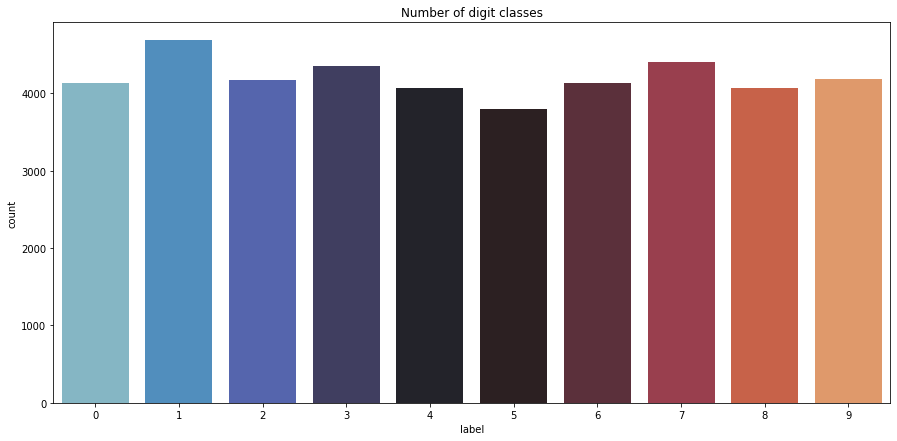

In [ ]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

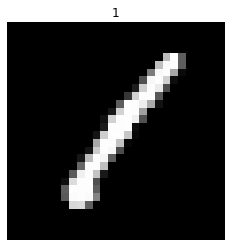

In [ ]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_data.iloc[0,0])
plt.axis("off")
plt.show()

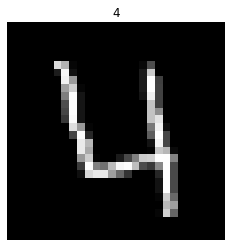

In [ ]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_data.iloc[3,0])
plt.axis("off")
plt.show()

# Normalization, Reshape and Label Encoding

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test_data = test_data / 255.0
print("x_train shape: ",X_train.shape)
print("test data shape: ",test_data.shape)

x_train shape:  (42000, 784)
test data shape:  (28000, 784)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test data shape: ",test_data.shape)

x_train shape:  (42000, 28, 28, 1)
test data shape:  (28000, 28, 28, 1)


In [ ]:
# Label Encoding 
Y_train = to_categorical(Y_train, num_classes = 10)

# Train Test Split

In [ ]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


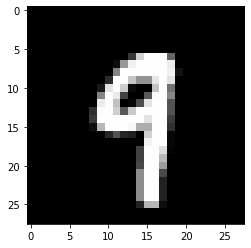

In [ ]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

# Convolutional Neural Network

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [87]:
model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [70]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [89]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)              

In [72]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [73]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
151/151 [==============================] - 20s 91ms/step - loss: 1.5498 - accuracy: 0.4643 - val_loss: 0.2161 - val_accuracy: 0.9431
Epoch 2/10
151/151 [==============================] - 13s 88ms/step - loss: 0.4666 - accuracy: 0.8511 - val_loss: 0.1407 - val_accuracy: 0.9612
Epoch 3/10
151/151 [==============================] - 13s 88ms/step - loss: 0.3277 - accuracy: 0.8981 - val_loss: 0.1068 - val_accuracy: 0.9683
Epoch 4/10
151/151 [==============================] - 13s 88ms/step - loss: 0.2757 - accuracy: 0.9160 - val_loss: 0.0908 - val_accuracy: 0.9719
Epoch 5/10
151/151 [==============================] - 13s 88ms/step - loss: 0.2405 - accuracy: 0.9248 - val_loss: 0.0876 - val_accuracy: 0.9731
Epoch 6/10
151/151 [==============================] - 14s 89ms/step - loss: 0.2162 - accuracy: 0.9365 - val_loss: 0.0740 - val_accuracy: 0.9776
Epoch 7/10
151/151 [==============================] - 13s 89ms/step - loss: 0.1948 - accuracy: 0.9391 - val_loss: 0.0736 - val_accuracy:

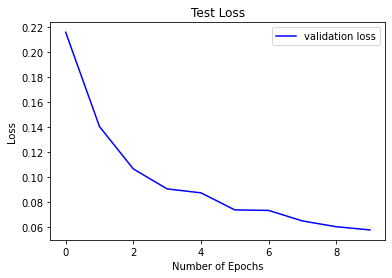

In [ ]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

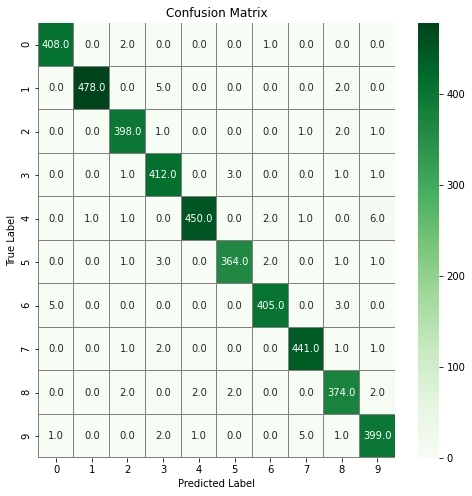

In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Extended Training Set

In [92]:
# Load extended training set
(X_train_full, Y_train_full), (X_test_full, Y_test_full) = mnist.load_data()

In [93]:
# Split the train and the validation set for the fitting
X_train_full, X_val_full, Y_train_full, Y_val_full = train_test_split(X_train_full, Y_train_full, test_size = 0.1, random_state=2)
print("x_train_full shape",X_train_full.shape)
print("x_val_full shape",X_val_full.shape)
print("y_train_full shape",Y_train_full.shape)
print("y_val_full shape",Y_val_full.shape)

x_train_full shape (54000, 28, 28)
x_val_full shape (6000, 28, 28)
y_train_full shape (54000,)
y_val_full shape (6000,)


In [94]:
# Normalize the data
X_train_full = X_train_full / 255.0
print("x_train_full shape: ",X_train_full.shape)

x_train_full shape:  (54000, 28, 28)


In [95]:
# Reshape
X_train_full = X_train_full.reshape(-1,28,28,1)
print("x_train_full shape: ", X_train_full.shape)
X_val_full = X_val_full.reshape(-1,28,28,1)
print("x_val_full shape: ", X_val_full.shape)

x_train_full shape:  (54000, 28, 28, 1)
x_val_full shape:  (6000, 28, 28, 1)


In [96]:
# Label Encoding 
Y_train_full = to_categorical(Y_train_full, num_classes = 10)
Y_val_full = to_categorical(Y_val_full, num_classes=10)

In [97]:
datagen.fit(X_train_full)

In [98]:
# Fit the model
history_full = model.fit_generator(datagen.flow(X_train_full,Y_train_full, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val_full,Y_val_full), steps_per_epoch=X_train_full.shape[0] // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
216/216 [==============================] - 21s 93ms/step - loss: 1.0901 - accuracy: 0.6326 - val_loss: 13.6068 - val_accuracy: 0.9635
Epoch 2/10
216/216 [==============================] - 20s 92ms/step - loss: 0.3167 - accuracy: 0.8999 - val_loss: 11.5123 - val_accuracy: 0.9733
Epoch 3/10
216/216 [==============================] - 20s 91ms/step - loss: 0.2487 - accuracy: 0.9229 - val_loss: 9.9947 - val_accuracy: 0.9762
Epoch 4/10
216/216 [==============================] - 20s 91ms/step - loss: 0.2165 - accuracy: 0.9343 - val_loss: 9.4827 - val_accuracy: 0.9788
Epoch 5/10
216/216 [==============================] - 20s 92ms/step - loss: 0.1856 - accuracy: 0.9408 - val_loss: 7.9189 - val_accuracy: 0.9810
Epoch 6/10
216/216 [==============================] - 19s 90ms/step - loss: 0.1725 - accuracy: 0.9464 - val_loss: 7.7859 - val_accuracy: 0.9827
Epoch 7/10
216/216 [==============================] - 20s 92ms/step - loss: 0.1627 - accuracy: 0.9507 - val_loss: 7.3321 - val_accurac

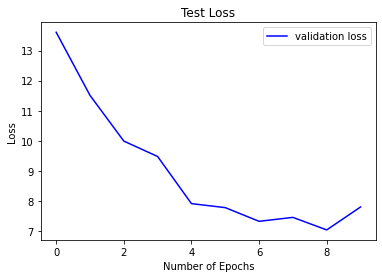

In [101]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history_full.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

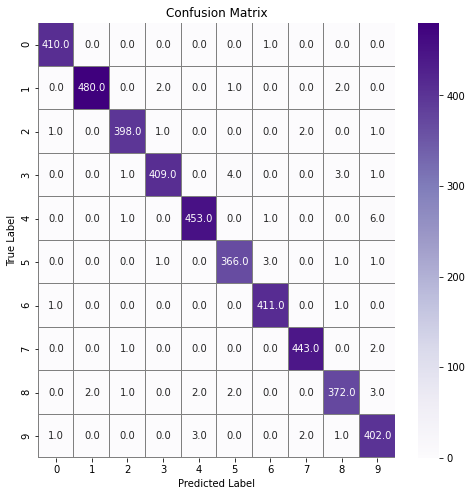

In [105]:
# confusion matrix

# Predict the values from the original validation dataset
Y_pred_full = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes_full = np.argmax(Y_pred_full,axis = 1) 
# Convert validation observations to one hot vectors
Y_true_full = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true_full, Y_pred_classes_full) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()